In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import normalize

In [2]:
# Define number of samples
n_samples = 1500

# Create a synthetic dataset

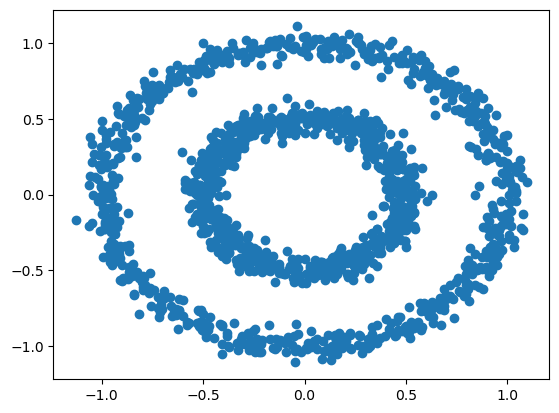

In [3]:
# Create first dataset
DB1 = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)[0]

plt.scatter(DB1[:, 0], DB1[:, 1])
plt.show()

k-mean cluster labels: [0 1 2]
[[ 0.18322677  0.59767433]
 [ 0.42290448 -0.44847469]
 [-0.60516693 -0.13069337]]


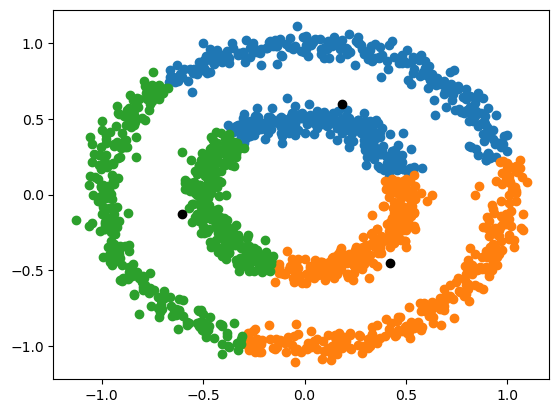

In [4]:
# Train k-means and show assigned labels
km_model = KMeans(n_clusters=3).fit(DB1)
print(f"k-mean cluster labels: {np.unique(km_model.labels_)}")
print(km_model.cluster_centers_)

plt.scatter(DB1[km_model.labels_==0, 0], DB1[km_model.labels_==0, 1])
plt.scatter(DB1[km_model.labels_==1, 0], DB1[km_model.labels_==1, 1])
plt.scatter(DB1[km_model.labels_==2, 0], DB1[km_model.labels_==2, 1])
plt.scatter(km_model.cluster_centers_[:, 0], km_model.cluster_centers_[:, 1], c='k')
plt.show()

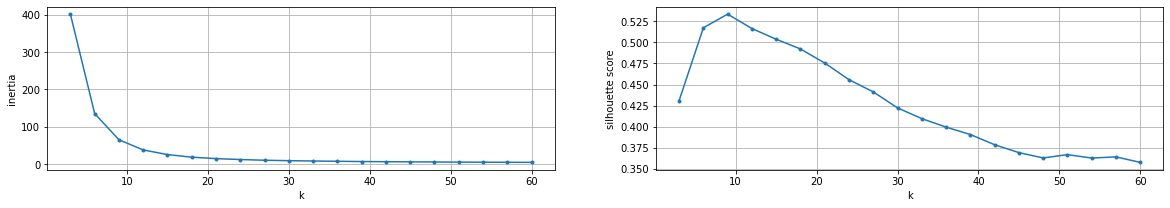

In [70]:
# Try different values for k and create elbow curve
inertia = []
silh = []
k_s = np.arange(3, 61, 3)
for k in k_s:
    km_model = KMeans(n_clusters=k).fit(DB1)
    inertia.append(km_model.inertia_)
    silh.append(silhouette_score(DB1, km_model.labels_))

plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
plt.plot(k_s, inertia, '.-')
plt.grid()
plt.xlabel('k')
plt.ylabel('inertia')
plt.subplot(1, 2, 2)
plt.plot(k_s, silh, '.-')
plt.grid()
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.show()

k-mean cluster labels: [0 1 2 3 4 5 6 7 8]


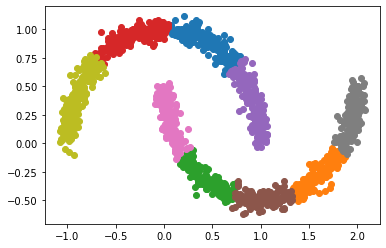

In [71]:
# 9 seems like a good inflection point. Let's try it out
km_model = KMeans(n_clusters=9).fit(DB1)
print(f"k-mean cluster labels: {np.unique(km_model.labels_)}")

for c in np.unique(km_model.labels_):
    plt.scatter(DB1[km_model.labels_==c, 0], DB1[km_model.labels_==c, 1])
plt.show()

Agglomerative cluster labels: [0 1 2]


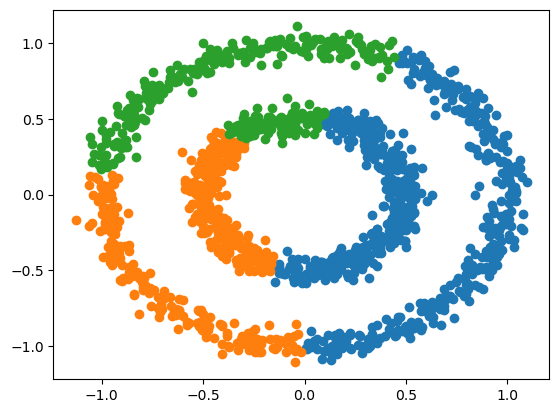

In [9]:
# Let's try agglomerative
agglo_model = AgglomerativeClustering(n_clusters=3, linkage='ward').fit(DB1)
print(f"Agglomerative cluster labels: {np.unique(agglo_model.labels_)}")

for c in np.unique(agglo_model.labels_):
    plt.scatter(DB1[agglo_model.labels_==c, 0], DB1[agglo_model.labels_==c, 1])
plt.show()

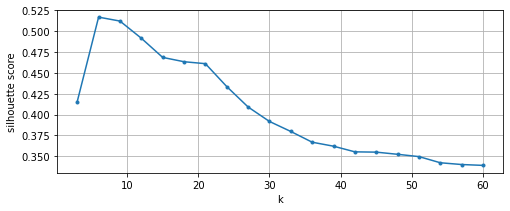

In [77]:
# Try different values for k and create elbow curve
# this one must be run for different linkage strategies
silh = []
k_s = np.arange(3, 61, 3)
for k in k_s:
    agglo_model = AgglomerativeClustering(n_clusters=k, linkage='ward').fit(DB1)
    silh.append(silhouette_score(DB1, agglo_model.labels_))

plt.figure(figsize=(8, 3))
plt.plot(k_s, silh, '.-')
plt.grid()
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.show()

k-mean cluster labels: [0 1 2 3 4 5]


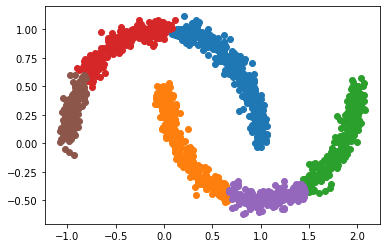

In [78]:
# 6 seems like a good inflection point. Let's try it out
agglo_model = AgglomerativeClustering(n_clusters=6, linkage='average').fit(DB1)
print(f"k-mean cluster labels: {np.unique(agglo_model.labels_)}")

for c in np.unique(agglo_model.labels_):
    plt.scatter(DB1[agglo_model.labels_==c, 0], DB1[agglo_model.labels_==c, 1])
plt.show()

DBSCAN cluster labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23]


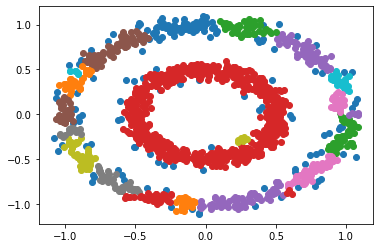

In [62]:
# Let's try DBSCAN
dbs_model = DBSCAN(eps=0.05, min_samples=5).fit(DB1)
print(f"DBSCAN cluster labels: {np.unique(dbs_model.labels_)}")

for c in np.unique(dbs_model.labels_):
    plt.scatter(DB1[dbs_model.labels_==c, 0], DB1[dbs_model.labels_==c, 1])
plt.show()

Max score=0.3495175312280692 at (0.08, 27)


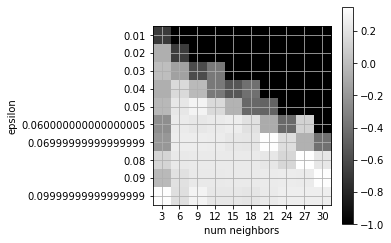

In [79]:
# Try different combinations of eps and num_of_samples
silh = -np.ones((10, 10))
maxScore = -1
maxE = 0
maxM = 0
for i, EPS in enumerate(np.arange(0.01, 0.11, 0.01)):
    for j, M in enumerate(range(3, 31, 3)):
        dbs_model = DBSCAN(eps=EPS, min_samples=M).fit(DB1)
        if len(np.unique(dbs_model.labels_)) > 1:
            silh[i, j] = silhouette_score(DB1, dbs_model.labels_)
        if silh[i, j] > maxScore:
            maxScore = silh[i, j]
            maxE = EPS
            maxM = M
print(f"Max score={maxScore} at ({maxE}, {maxM})")

plt.figure(figsize=(4, 4))
plt.imshow(silh, cmap='gray')
plt.colorbar()
plt.grid()
plt.xticks(range(10), labels=range(3, 31, 3))
plt.xlabel('num neighbors')
plt.yticks(range(10), labels=np.arange(0.01, 0.11, 0.01))
plt.ylabel('epsilon')
plt.show()

DBSCAN cluster labels: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12]


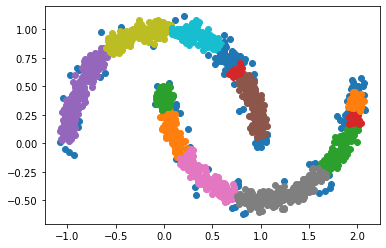

In [80]:
# Let's use those best parameters for DBSCAN
dbs_model = DBSCAN(eps=0.08, min_samples=27).fit(DB1)
print(f"DBSCAN cluster labels: {np.unique(dbs_model.labels_)}")

for c in np.unique(dbs_model.labels_):
    plt.scatter(DB1[dbs_model.labels_==c, 0], DB1[dbs_model.labels_==c, 1])
plt.show()

# Can you find a good clustering for each of the followind datasets?

In [64]:
# Create a few more synthetic datasets
DB2 = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
DB3 = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
DB4 = np.random.rand(n_samples, 2)
DB5 = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=170)[0]

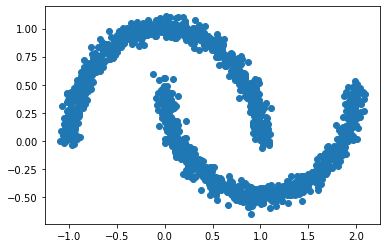

In [65]:
# Show second dataset
plt.scatter(DB2[:, 0], DB2[:, 1])
plt.show()

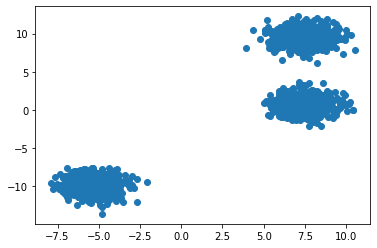

In [66]:
# Show third dataset
plt.scatter(DB3[:, 0], DB3[:, 1])
plt.show()

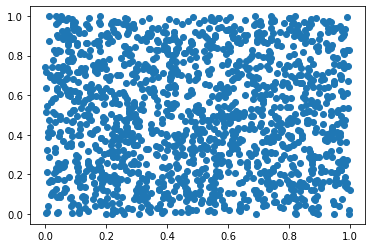

In [67]:
# Show fourth dataset
plt.scatter(DB4[:, 0], DB4[:, 1])
plt.show()

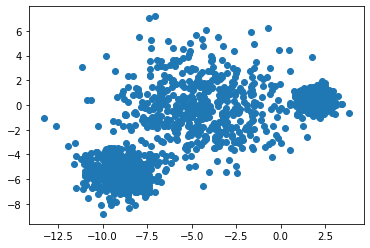

In [68]:
# Show fifth dataset
plt.scatter(DB5[:, 0], DB5[:, 1])
plt.show()

# A more interesting dataset

In [11]:
# Info on the dataset: https://www.kaggle.com/code/satishgunjal/tutorial-k-means-clustering/
df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
# Remove ID and put Gender into numeric format
df.drop(['CustomerID'], axis=1, inplace=True)
df["Gender"] = df["Gender"].astype('category').cat.codes
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [14]:
# Let's make sure there are no missing values
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [48]:
# Let's work with number directly (extract matrix from DataFrame)
X = df.to_numpy()
X.shape

(200, 4)

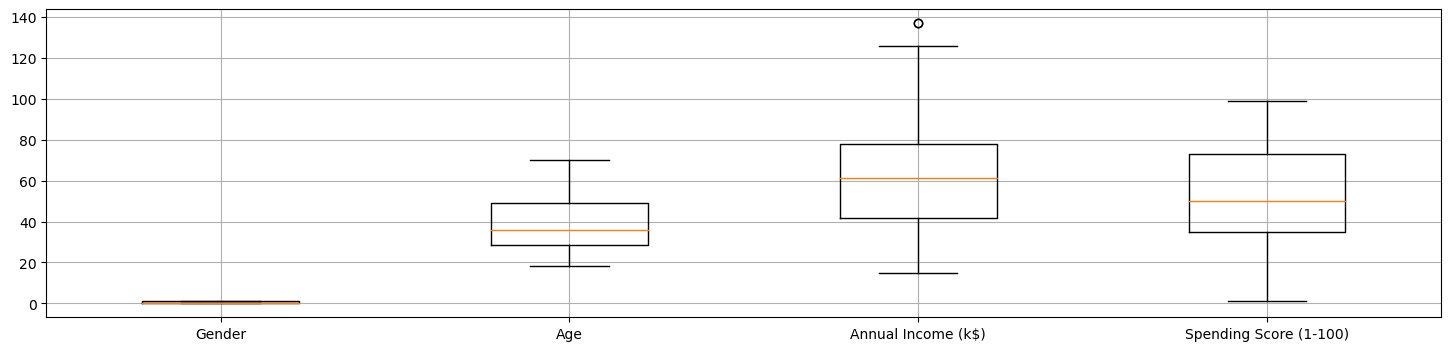

In [76]:
# Let's see the distribution of variables
plt.figure(figsize=(18, 4))
plt.boxplot(X)
plt.grid()
plt.xticks(ticks=range(1, 5), labels=df.columns)
plt.show()

#These distributions won't work. Can you tell why?

In [45]:
# Let's scale each variable
X = RobustScaler().fit_transform(X)
X.shape

(200, 4)

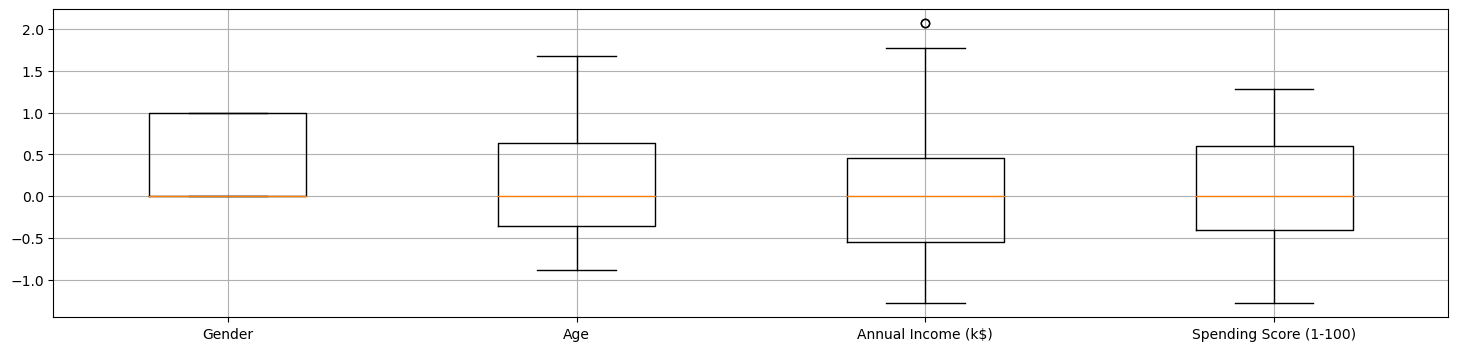

In [46]:
# Let's see the distribution of variables again
plt.figure(figsize=(18, 4))
plt.boxplot(X)
plt.grid()
plt.xticks(ticks=range(1, 5), labels=df.columns)
plt.show()

# They look better

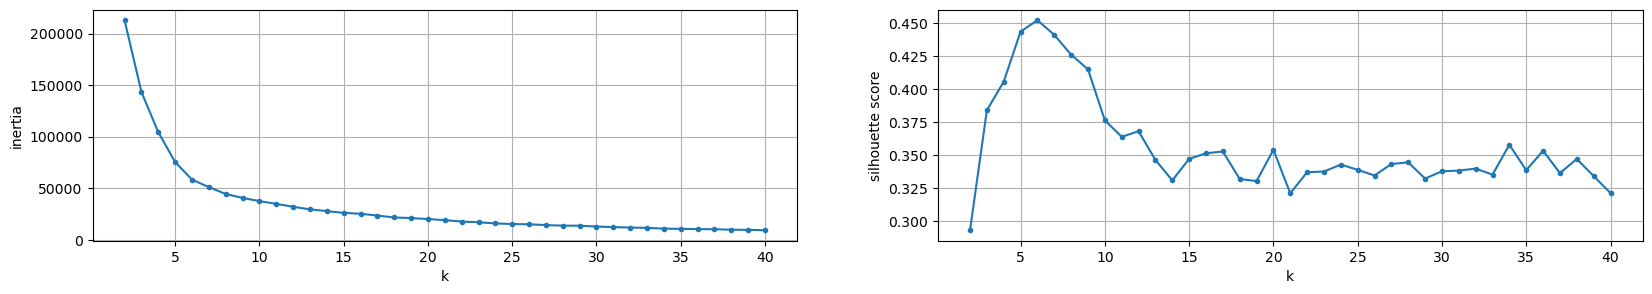

In [49]:
# Now find a good clustering for the data
inertia = []
silh = []
k_s = np.arange(2, 41)
for k in k_s:
    km_model = KMeans(n_clusters=k).fit(X)
    inertia.append(km_model.inertia_)
    silh.append(silhouette_score(X, km_model.labels_))

plt.figure(figsize=(20, 3))
plt.subplot(1, 2, 1)
plt.plot(k_s, inertia, '.-')
plt.grid()
plt.xlabel('k')
plt.ylabel('inertia')
plt.subplot(1, 2, 2)
plt.plot(k_s, silh, '.-')
plt.grid()
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.show()

In [ ]:
# Remember: we can actually try it with the original (unscaled) features, 
# the scaled feature (with different scalers), and even normalizing features
# with different normalization metrics.

In [50]:
# 6 seems like a good inflection point. Let's try it out
km_model = KMeans(n_clusters=6).fit(X)
print(f"k-mean cluster labels: {np.unique(km_model.labels_)}")

k-mean cluster labels: [0 1 2 3 4 5]


In [82]:
# Add cluster info to the dataframe
df['Cluster'] = km_model.labels_
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,5
1,1,21,15,81,4
2,0,20,16,6,5
3,0,23,16,77,4
4,0,31,17,40,5
...,...,...,...,...,...
195,0,35,120,79,2
196,0,45,126,28,1
197,1,32,126,74,2
198,1,32,137,18,1


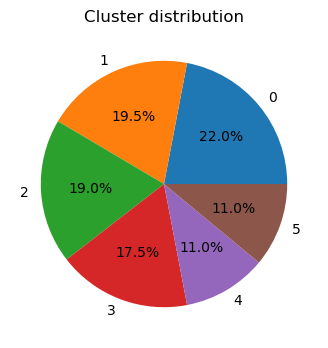

In [88]:
# Look at the distribution of passenger-classes
plt.figure(figsize=(4, 4))
plt.title('Cluster distribution')
plt.pie(df['Cluster'].value_counts(), labels=range(6), autopct='%1.1f%%', textprops={'fontsize': 10})
plt.show()

[44 35 39 38 22 22]


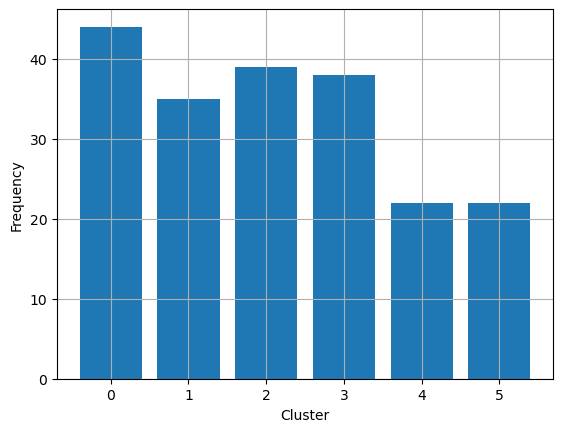

In [103]:
# Count size of each cluster
y_hist, _ = np.histogram(km_model.labels_, np.arange(-0.5, 6, 1))
print(y_hist)

# Show histogram
plt.bar(np.unique(km_model.labels_), y_hist)
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.grid()
plt.show()

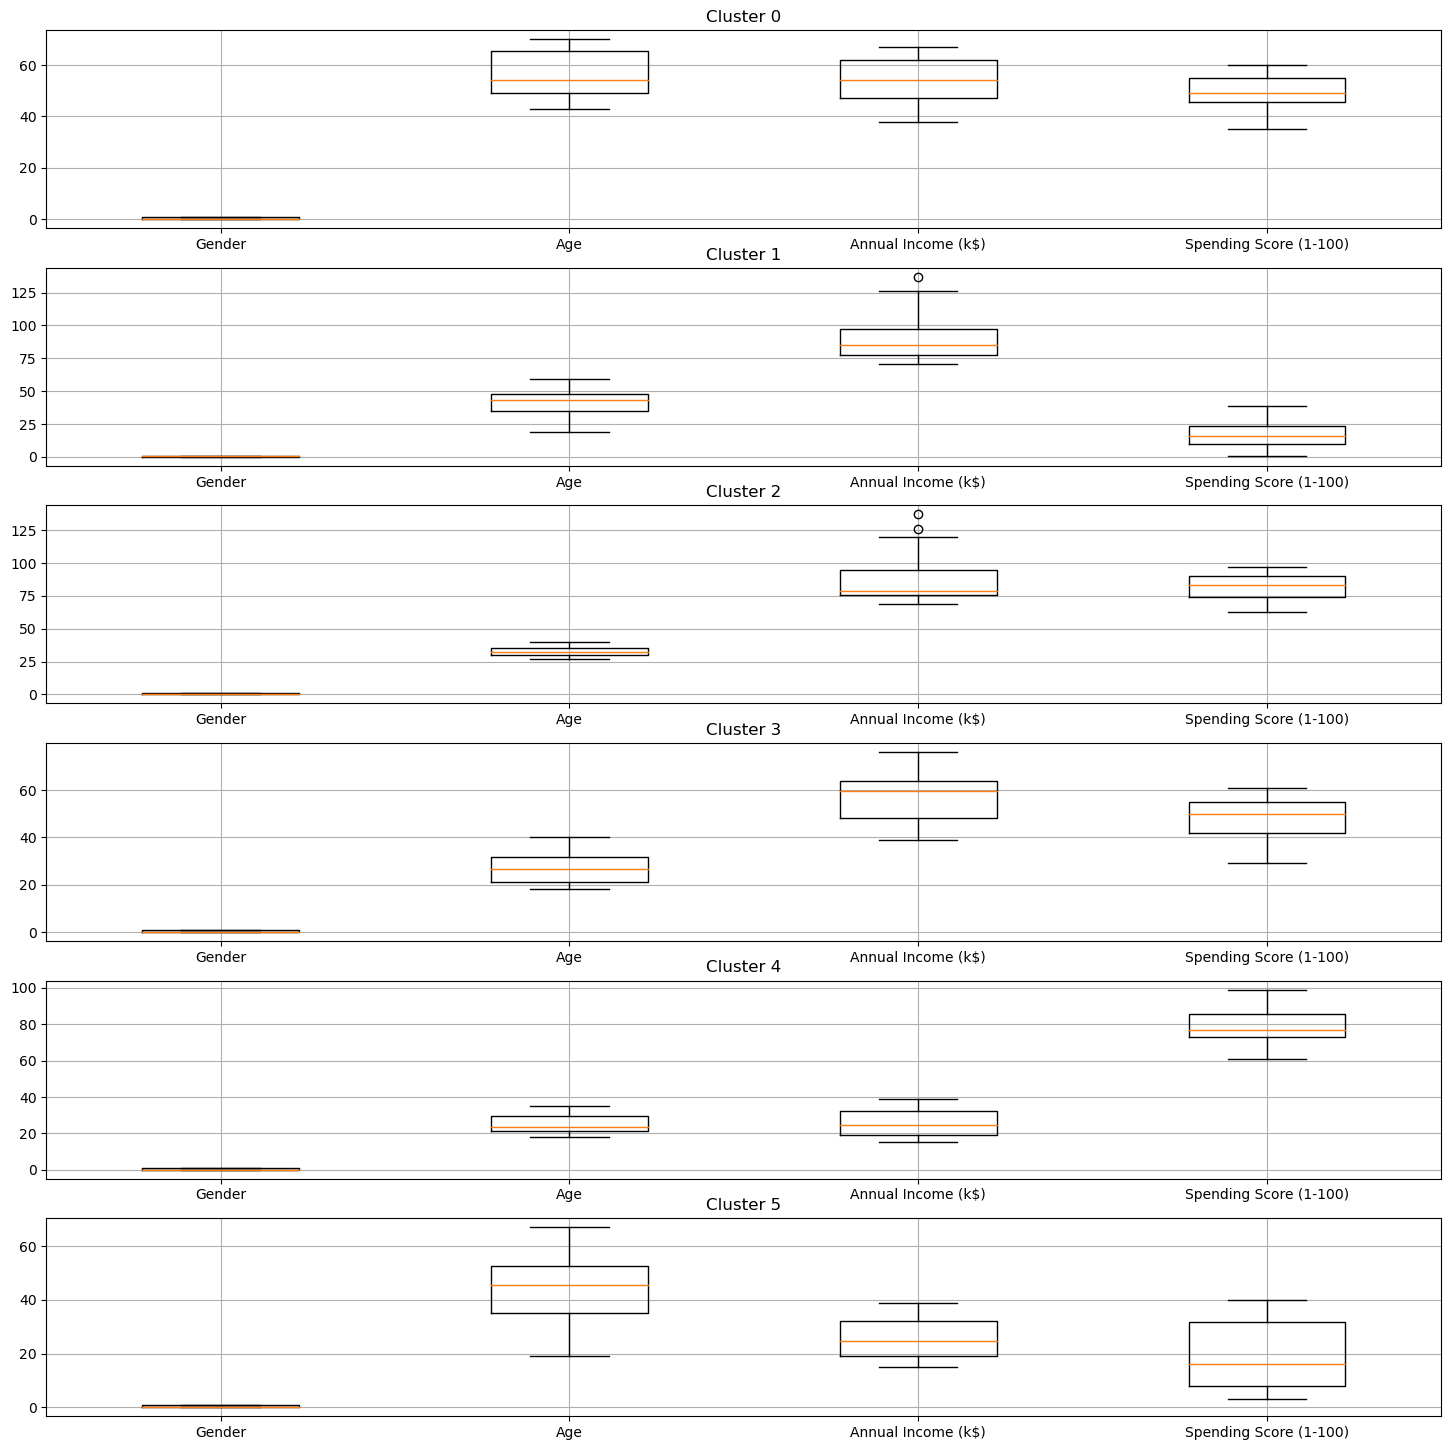

In [75]:
# Let's see the distribution of variables across all clusters
plt.figure(figsize=(18, 18))
for c in np.unique(km_model.labels_):
    plt.subplot(6, 1, c+1)
    plt.title(f'Cluster {c}')
    plt.boxplot(X[km_model.labels_==c, :])
    plt.grid()
    plt.xticks(ticks=range(1, 5), labels=df.columns)
plt.show()

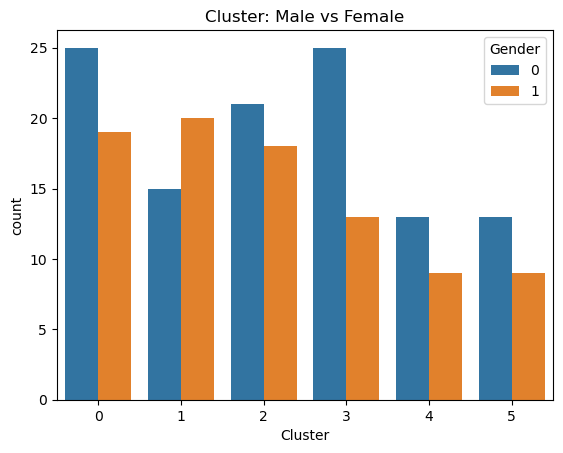

In [91]:
# See the distribution of gender per cluster
sns.countplot(x='Cluster', hue='Gender', data=df)
plt.title('Cluster: Male vs Female')
plt.show()

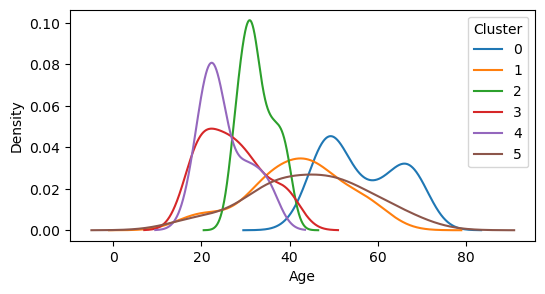

In [100]:
# Show the distribution of one variable (Age) per cluster
plt.figure(figsize=(6, 3))
df.groupby('Cluster')['Age'].plot(kind='kde')
plt.legend(range(6), title='Cluster')
plt.xlabel('Age')
plt.show()

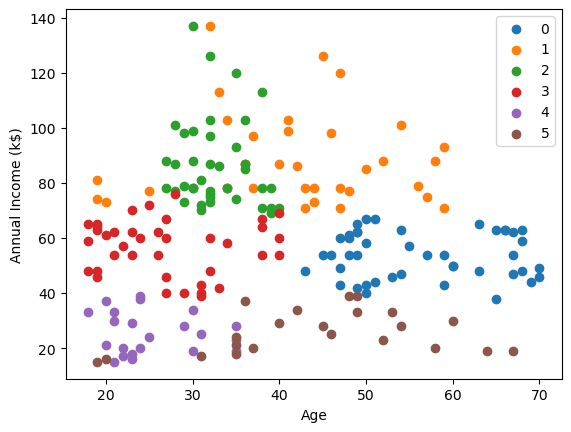

In [108]:
# Assume for now, that the two most interesting variables are 'Age' and 'Annual Income'
# let's plot clusters using these two variables
for c in np.unique(km_model.labels_):
    plt.scatter(df['Age'][df.Cluster == c], df['Annual Income (k$)'][df.Cluster == c], label=c)

plt.legend()
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()